# Модель машиннго обучения - GradientBoosting!!!

In [1]:
# загружаем библиотеки
import pandas as pd # работа с данными / python data analysis library
import numpy as np # работа с числовыми данными / python numerical computing library
import seaborn as sns # визуализация данных / python data visualization library
import matplotlib.pyplot as plt # визуализация данных / python data visualization library

from sklearn.ensemble import GradientBoostingRegressor # алгоритм градиентного бустинга для задач регрессии

from sklearn.metrics import mean_absolute_error # метрика средняя абсолютная ошибка / mean absolute error
from sklearn.metrics import mean_squared_error # метрика средняя квадратичная ошибка / mean squared error
from sklearn.metrics import mean_absolute_percentage_error # метрика средняя абсолютная процентная ошибка / mean absolute percentage error

from sklearn.model_selection import train_test_split # разделение выборки на обучающую и тестовую / train_test_split
from sklearn.feature_selection import SelectKBest, f_regression # алгоритм для выбора признаков с наивысшими оценками в модели машинного обучения на основе статистических тестов / f-regression одномерный тест линейной регрессии  
from sklearn.preprocessing import MinMaxScaler # алгоритм стандартизации данных / MinMaxScaler

from joblib import dump, load

from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING) # отключаем вывод промежуточных итогов вычислений

# отключаем предупреждения
import warnings 
warnings.filterwarnings("ignore")

# фиксируем RANDOM_SEED, для воспроизводимости кода.
RANDOM_SEED = 369


Тренировочная выборка:
     RMSE: 0.49
     MAE: 0.35
     MAPE: 2.80%
Валидационная выборка:
     RMSE: 0.49
     MAE: 0.35
     MAPE: 2.80%
Тестовая выборка:
     RMSE: 0.50
     MAE: 0.36
     MAPE: 2.82%



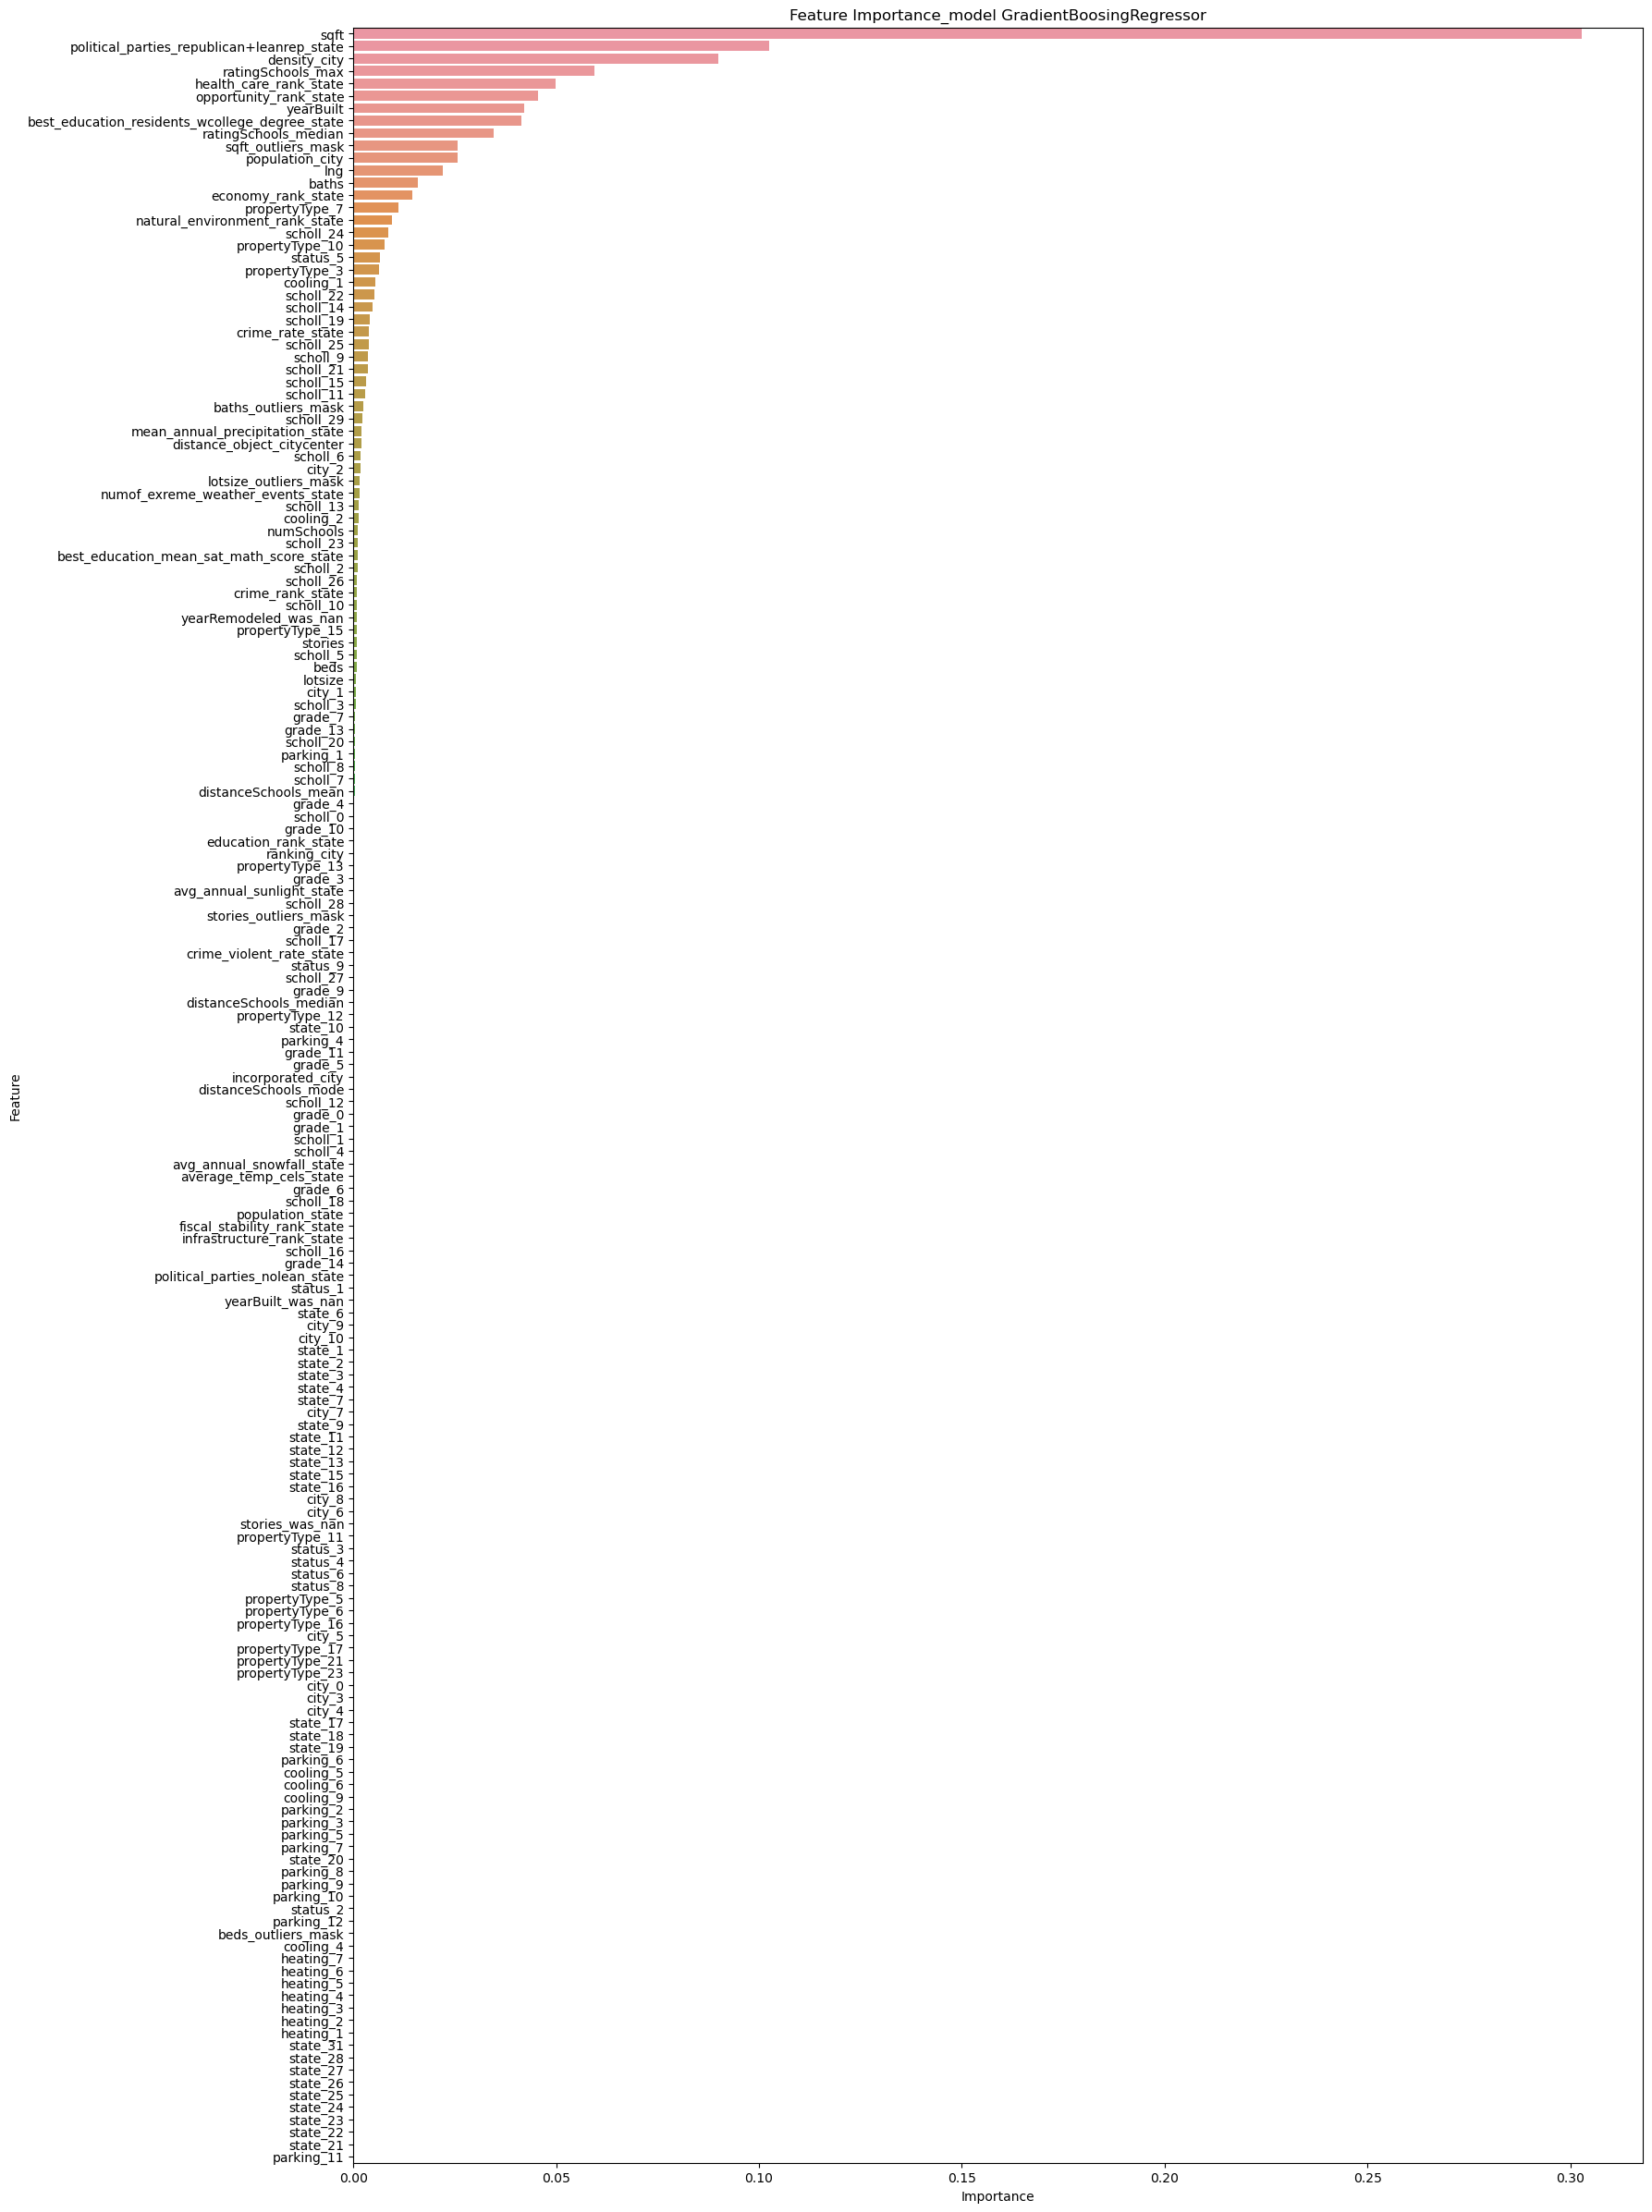

CPU times: user 5min 16s, sys: 3.03 s, total: 5min 19s
Wall time: 5min 25s


In [2]:
%%time
# загружаем данные
data_gbr = pd.read_csv("data/data_final.csv", sep=",")

# создаем матрицу наблюдений и вектор правильных ответов
X = data_gbr.drop(columns="target", axis=1)
y = data_gbr["target"]

# производим разделение выборки на тренировочную, валидационную и тестовую
X_train, X_validtest, y_train, y_validtest = train_test_split(X, y, train_size=0.8, random_state=RANDOM_SEED)
X_valid, X_test, y_valid, y_test = train_test_split(X_validtest, y_validtest, test_size=0.5, random_state=RANDOM_SEED)

# #производим отбор наиболее важных признаков
# selector = SelectKBest(score_func=f_regression, k=50)
# selector.fit(X_train, y_train)
# best_features = selector.get_feature_names_out()
# X_train = X_train[best_features]
# X_valid = X_valid[best_features]
# X_test = X_test[best_features]

# формируем лист признаков для графика
feature_names = X_train.columns

# производим нормализацию данных
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_valid = min_max_scaler.transform(X_valid)
X_test = min_max_scaler.transform(X_test)

# строим и обучаем модель
model_gbr = GradientBoostingRegressor(random_state=RANDOM_SEED) #learning_rate=0.5, n_estimators=200, max_depth=12, min_samples_split=7)
model_gbr.fit(X_train, y_train)
# формируем предсказания
y_train_predict_gbr = model_gbr.predict(X_train)
y_valid_predict_gbr = model_gbr.predict(X_valid)
y_test_predict_gbr = model_gbr.predict(X_test)

# выводим метрики оценки качества
print()
print("Тренировочная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_predict_gbr))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_train, y_train_predict_gbr)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_train, y_train_predict_gbr)*100))
print("Валидационная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_valid, y_valid_predict_gbr))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_valid, y_valid_predict_gbr)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_valid, y_valid_predict_gbr)*100))
print("Тестовая выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_predict_gbr))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_test, y_test_predict_gbr)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_test, y_test_predict_gbr)*100))
print()

# выводим график важности признаков
feature_importance = model_gbr.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(18, 30))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance_model GradientBoosingRegressor")
plt.show()

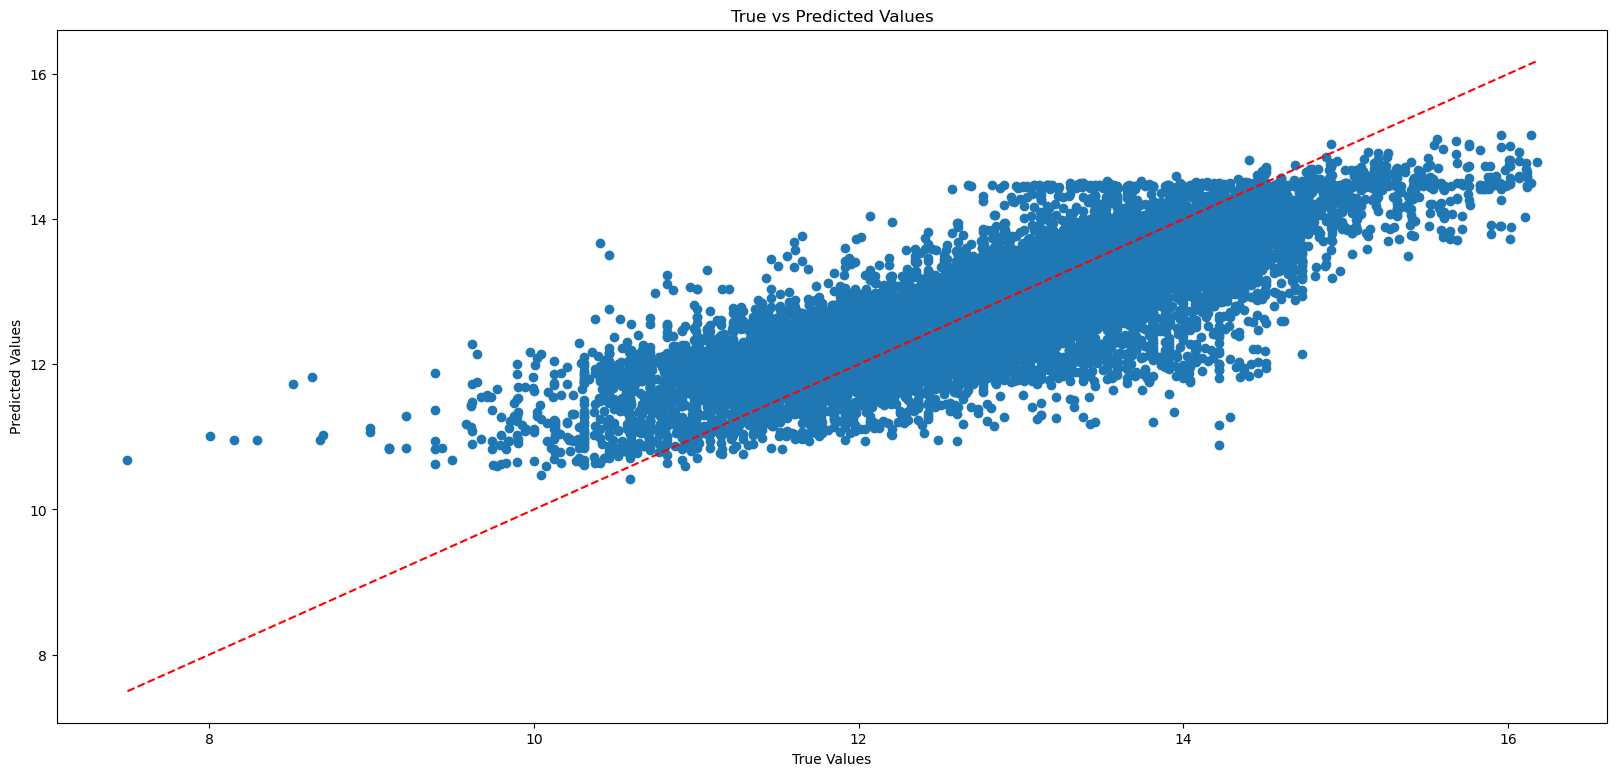

In [3]:
# график предсказанных значений против истинных значений на тестовой выборке
y_pred = y_test_predict_gbr
plt.figure(figsize=(20, 9))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

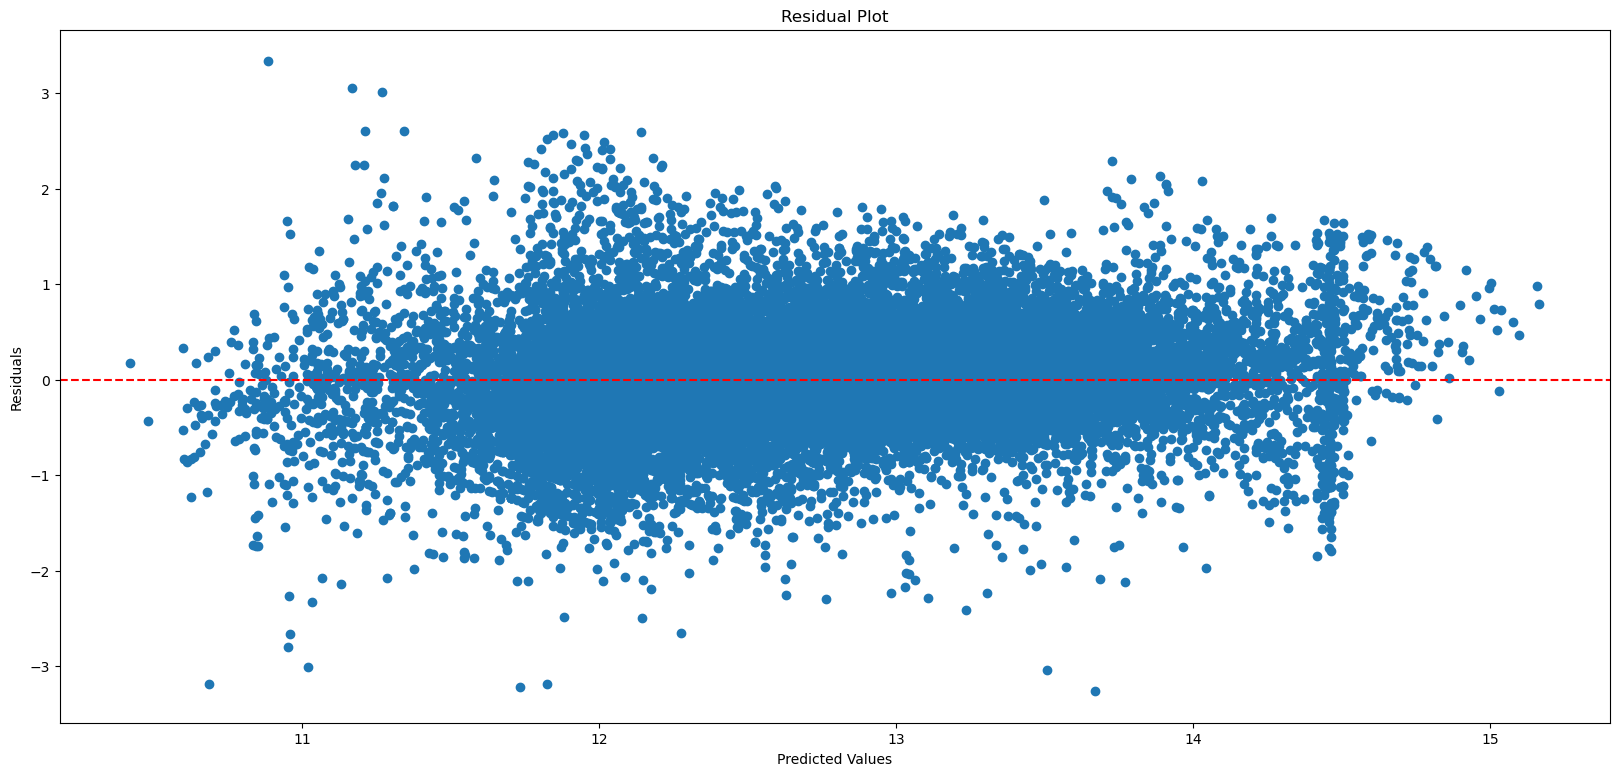

In [4]:
# график остатков на тестовой выборке
residuals = y_test - y_pred
plt.figure(figsize=(20, 9))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [5]:
# cохраняем модель в файл
dump(model_gbr, "model/model_GradientBoostingRegressor.joblib")

['model/model_GradientBoostingRegressor.joblib']

#### Optimization library - **OPTUNA** - Подбор гиперпараметров

In [6]:
%%time
# фломируем модель optuna для подбора гиперпараметров
def optuna_objective(trial):
    # задаем диапазон значений гиперпараметров
    param = {
             "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
             "max_depth": trial.suggest_int("max_depth", 3, 10),
             "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
             "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
             "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
             "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"])
             }

    # инициализируем и обучаем модель
    optuna_gbr = GradientBoostingRegressor(**param, random_state=RANDOM_SEED)
    optuna_gbr.fit(X_train, y_train) #, eval_set=[(X_valid, y_valid)], early_stopping_rounds=50, verbose=False)

    # формируем предсказания на валидных данных
    y_pred = optuna_gbr.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)

    # # cообщаем оптимизатору текущий результат
    # trial.report(mae, optuna_gbr.best_iteration)

    # # проверяем, следует ли обрезать пробу
    # if trial.should_prune():
    #     raise optuna.exceptions.TrialPruned()

    return mae

# создаем и оптимизируем исследование с MedianPruner
study = optuna.create_study(direction="minimize", pruner=optuna.pruners.MedianPruner())
study.optimize(optuna_objective, n_trials=50, show_progress_bar=True)

# выводим лучшие параметры
best_params = study.best_trial.params
print(f"Лучшие параметры: {best_params}")

  0%|          | 0/50 [00:00<?, ?it/s]

Лучшие параметры: {'n_estimators': 886, 'max_depth': 10, 'learning_rate': 0.09391443280818129, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
CPU times: user 7h 10min 54s, sys: 1min 45s, total: 7h 12min 40s
Wall time: 7h 20min 13s


In [7]:
%%time
# инициализируем и обучаем модель с подобранными параметрами
model_gbr_optuna = GradientBoostingRegressor(**best_params,
                                          random_state=RANDOM_SEED)
model_gbr_optuna.fit(X_train, y_train)

# формируем предсказания
y_train_predict_gbr_opt = model_gbr_optuna.predict(X_train)
y_valid_predict_gbr_opt = model_gbr_optuna.predict(X_valid)
y_test_predict_gbr_opt = model_gbr_optuna.predict(X_test)

# выводим метрики оценки качества
print()
print("Тренировочная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_predict_gbr_opt))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_train, y_train_predict_gbr_opt)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_train, y_train_predict_gbr_opt)*100))
print("Валидационная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_valid, y_valid_predict_gbr_opt))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_valid, y_valid_predict_gbr_opt)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_valid, y_valid_predict_gbr_opt)*100))
print("Тестовая выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_predict_gbr_opt))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_test, y_test_predict_gbr_opt)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_test, y_test_predict_gbr_opt)*100))
print()


Тренировочная выборка:
     RMSE: 0.20
     MAE: 0.13
     MAPE: 1.02%
Валидационная выборка:
     RMSE: 0.33
     MAE: 0.21
     MAPE: 1.63%
Тестовая выборка:
     RMSE: 0.33
     MAE: 0.21
     MAPE: 1.64%

CPU times: user 14min 10s, sys: 3.49 s, total: 14min 13s
Wall time: 14min 28s


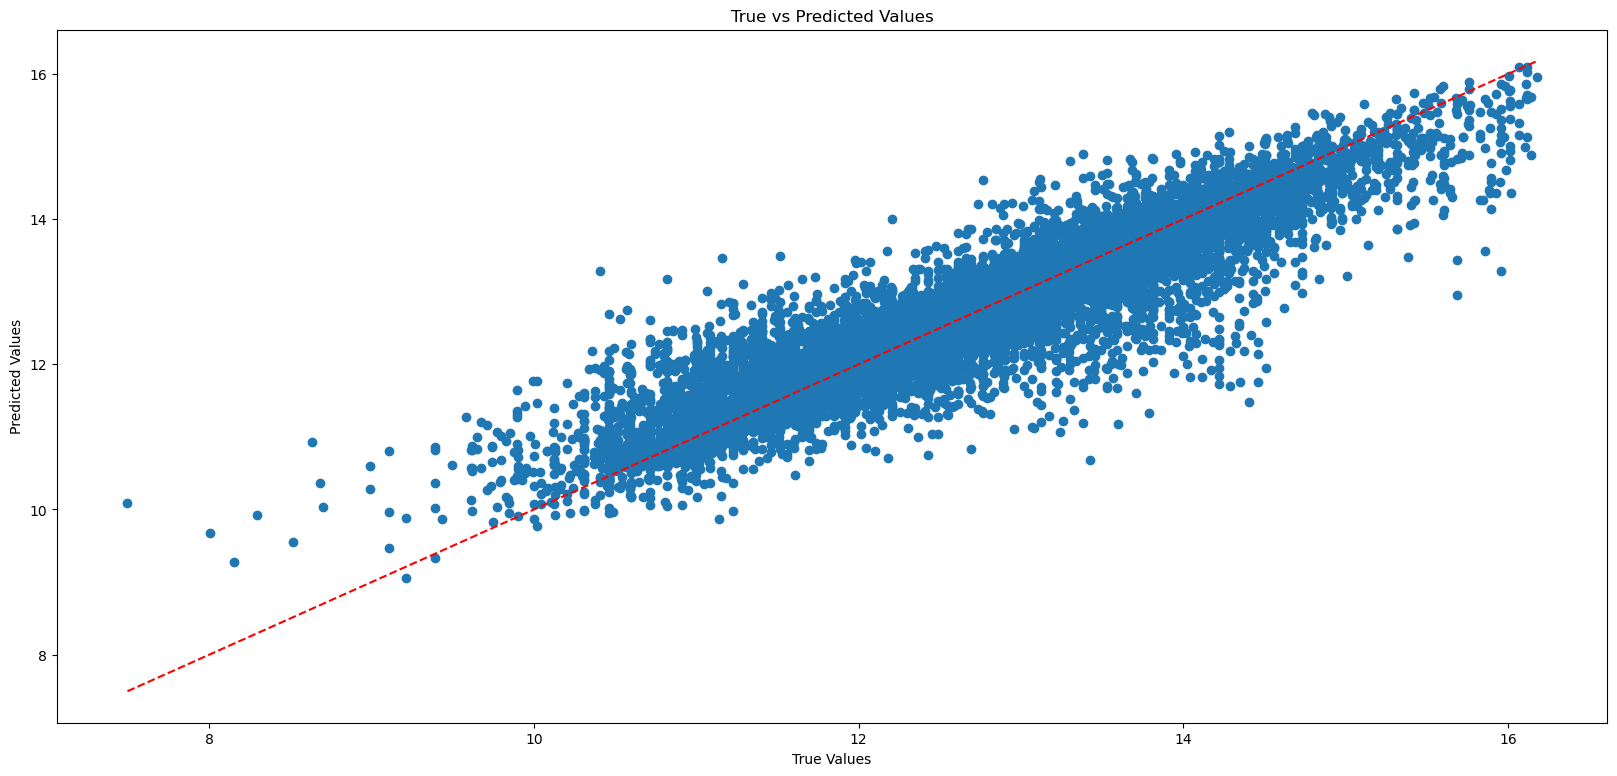

In [8]:
# график предсказанных значений против истинных значений на тестовой выборке
plt.figure(figsize=(20, 9))
plt.scatter(y_test, y_test_predict_gbr_opt)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

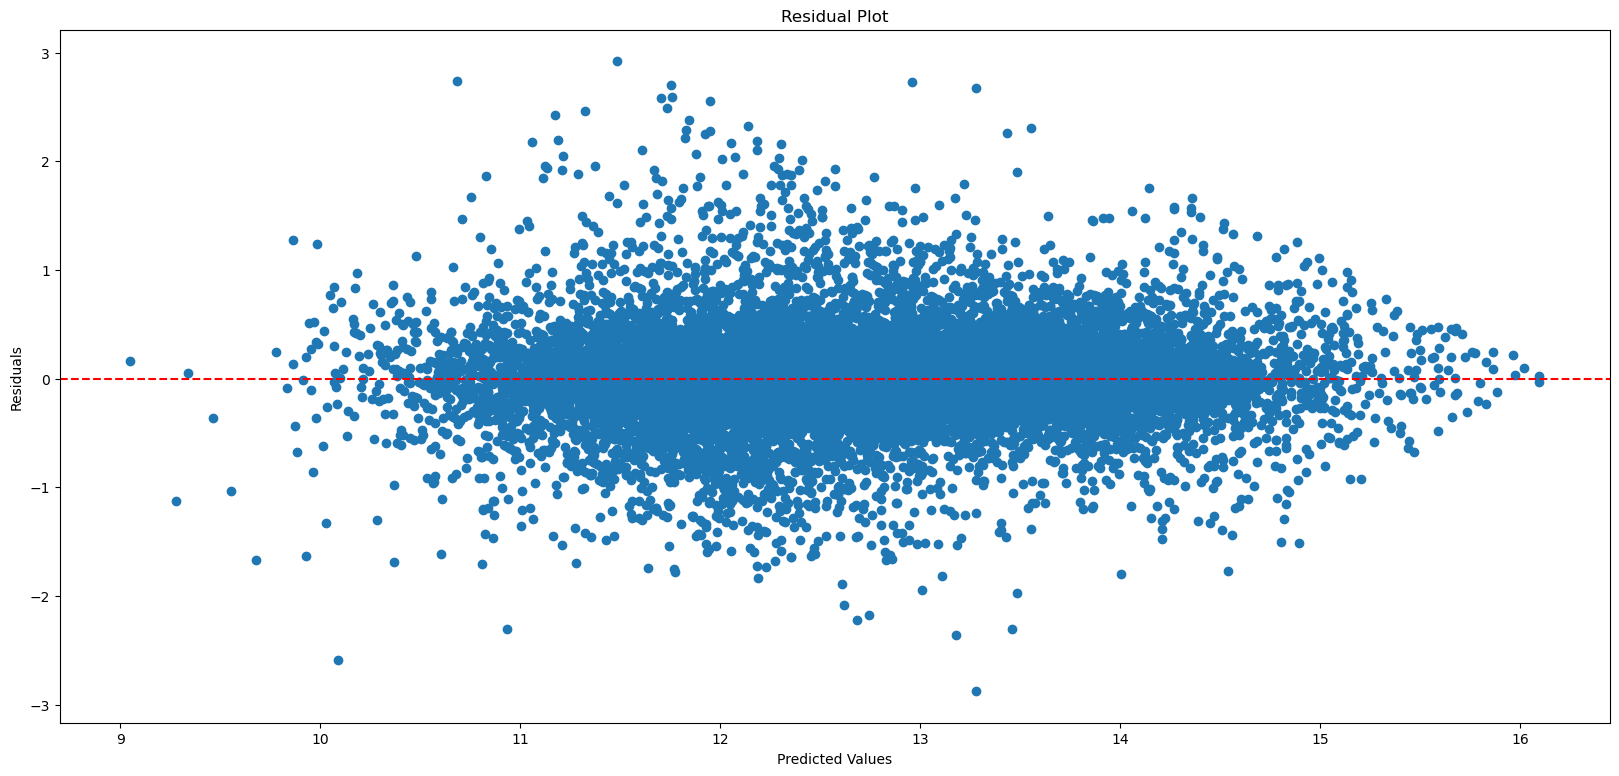

In [9]:
# график остатков на тестовой выборке
residuals = y_test - y_test_predict_gbr_opt
plt.figure(figsize=(20, 9))
plt.scatter(y_test_predict_gbr_opt, residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [10]:
# формируем и выводим график истории оптимизации
optuna.visualization.plot_optimization_history(study, target_name="mae")

In [11]:
# формируем и выводим график важности гиперпараметров
optuna.visualization.plot_param_importances(study, target_name="mae")

In [12]:
# визуализация контуров гиперпараметров
optuna.visualization.plot_contour(study, params=["min_samples_split", "learning_rate"], target_name="mae")

In [13]:
# визуализация среза
optuna.visualization.plot_slice(study, target_name="mae")

In [14]:
# визуализация промежуточных значений (полезна, если вы используете промежуточные значения во время оптимизации)
optuna.visualization.plot_intermediate_values(study)

[W 2024-03-27 02:30:42,593] You need to set up the pruning feature to utilize `plot_intermediate_values()`


In [15]:
# визуализация прогресса оптимизации для параллельной координатной плоскости
optuna.visualization.plot_parallel_coordinate(study, target_name="mae")

In [16]:
# визуализация соотношения гиперпараметров к целевой метрике
optuna.visualization.plot_edf(study, target_name="mae")

In [17]:
# cохраняем модель в файл
dump(model_gbr_optuna, "model/model_GradientBoostingRegressorOptuna.joblib")

['model/model_GradientBoostingRegressorOptuna.joblib']

#### Optimization library **Hyperopt** - подбор гиперпараметров модели

In [18]:
%%time
# определяем пространство поиска
space = {
    "n_estimators": hp.quniform("n_estimators", 100, 1000, 1),
    "max_depth": hp.quniform("max_depth", 3, 10, 1),
    "learning_rate": hp.loguniform("learning_rate", np.log(0.001), np.log(0.1)),
    "min_samples_split": hp.quniform("min_samples_split", 2, 10, 1),
    "min_samples_leaf": hp.quniform("min_samples_leaf", 1, 10, 1),
    "max_features": hp.choice("max_features", ["sqrt", "log2"])
}

# задаем функцию цели для hyperopt
def hyperopt_objective(params):
    # преобразуем значения гиперпараметров к целым числам, где это необходимо
    params["n_estimators"] = int(params["n_estimators"])
    params["max_depth"] = int(params["max_depth"])
    params["min_samples_split"] = int(params["min_samples_split"])
    params["min_samples_leaf"] = int(params["min_samples_leaf"])

    # инициализируем и обучаем модель
    model = GradientBoostingRegressor(**params, random_state=RANDOM_SEED)
    model.fit(X_train, y_train)

    # формируем предсказания на валидных данных
    y_pred = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)

    return {"loss": mae, "status": STATUS_OK}

# запускаем оптимизацию
trials = Trials()
best = fmin(
    fn=hyperopt_objective,
    space=space,
    algo=tpe.suggest,
    max_evals=40,
    trials=trials
)

# преобразуем индекс категориального параметра обратно в значение
best["max_features"] = ["sqrt", "log2"][best["max_features"]]

print(f"Лучшие параметры: {best}")

100%|██████████| 40/40 [4:56:55<00:00, 445.38s/trial, best loss: 0.2042514275838872]   
Лучшие параметры: {'learning_rate': 0.08799604490839202, 'max_depth': 10.0, 'max_features': 'sqrt', 'min_samples_leaf': 4.0, 'min_samples_split': 6.0, 'n_estimators': 992.0}
CPU times: user 4h 50min 47s, sys: 1min 9s, total: 4h 51min 56s
Wall time: 4h 56min 55s


In [19]:
%%time
# продолжим подбор параметров, увеличиваем max_evals(должен быть строго больше, чем на предыдуших итерациях) и используем старый trials
best=fmin(hyperopt_objective, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=50, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(RANDOM_SEED) # фиксируем для повторяемости результата
         )
print("Наилучшие значения гиперпараметров {}".format(best))

100%|██████████| 50/50 [1:05:52<00:00, 395.29s/trial, best loss: 0.2042514275838872]
Наилучшие значения гиперпараметров {'learning_rate': 0.08799604490839202, 'max_depth': 10.0, 'max_features': 0, 'min_samples_leaf': 4.0, 'min_samples_split': 6.0, 'n_estimators': 992.0}
CPU times: user 1h 4min 29s, sys: 15.8 s, total: 1h 4min 45s
Wall time: 1h 5min 52s


In [22]:
%%time
# инициализируем и обучаем модель с подобранными параметрами
best["max_depth"] = int(best["max_depth"])
best["max_features"] = ["sqrt", "log2"][best["max_features"]]
best["min_samples_leaf"] = int(best["min_samples_leaf"])
best["min_samples_split"] = int(best["min_samples_split"])
best["n_estimators"] = int(best["n_estimators"])
    
model_gbr_hyperopt = GradientBoostingRegressor(**best,
                                          random_state=RANDOM_SEED)
model_gbr_hyperopt.fit(X_train, y_train)

# формируем предсказания
y_train_predict_gbr_hyp = model_gbr_hyperopt.predict(X_train)
y_valid_predict_gbr_hyp = model_gbr_hyperopt.predict(X_valid)
y_test_predict_gbr_hyp = model_gbr_hyperopt.predict(X_test)

# выводим метрики оценки качества
print()
print("Тренировочная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_predict_gbr_hyp))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_train, y_train_predict_gbr_hyp)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_train, y_train_predict_gbr_hyp)*100))
print("Валидационная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_valid, y_valid_predict_gbr_hyp))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_valid, y_valid_predict_gbr_hyp)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_valid, y_valid_predict_gbr_hyp)*100))
print("Тестовая выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_predict_gbr_hyp))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_test, y_test_predict_gbr_hyp)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_test, y_test_predict_gbr_hyp)*100))
print()


Тренировочная выборка:
     RMSE: 0.20
     MAE: 0.13
     MAPE: 1.00%
Валидационная выборка:
     RMSE: 0.33
     MAE: 0.20
     MAPE: 1.62%
Тестовая выборка:
     RMSE: 0.33
     MAE: 0.21
     MAPE: 1.64%

CPU times: user 15min 24s, sys: 4.09 s, total: 15min 28s
Wall time: 15min 50s


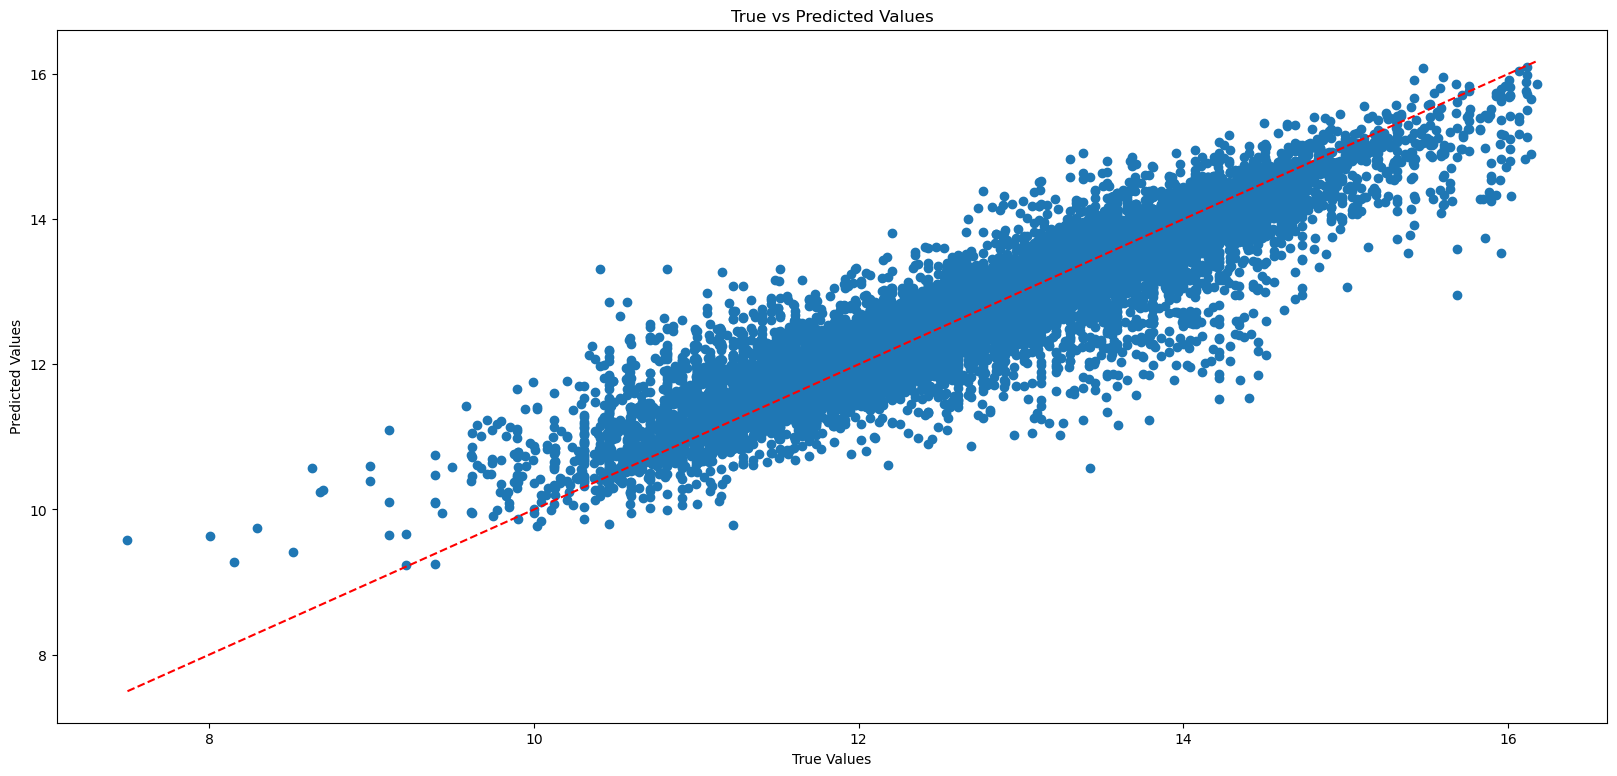

In [23]:
# график предсказанных значений против истинных значений на тестовой выборке
plt.figure(figsize=(20, 9))
plt.scatter(y_test, y_test_predict_gbr_hyp)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

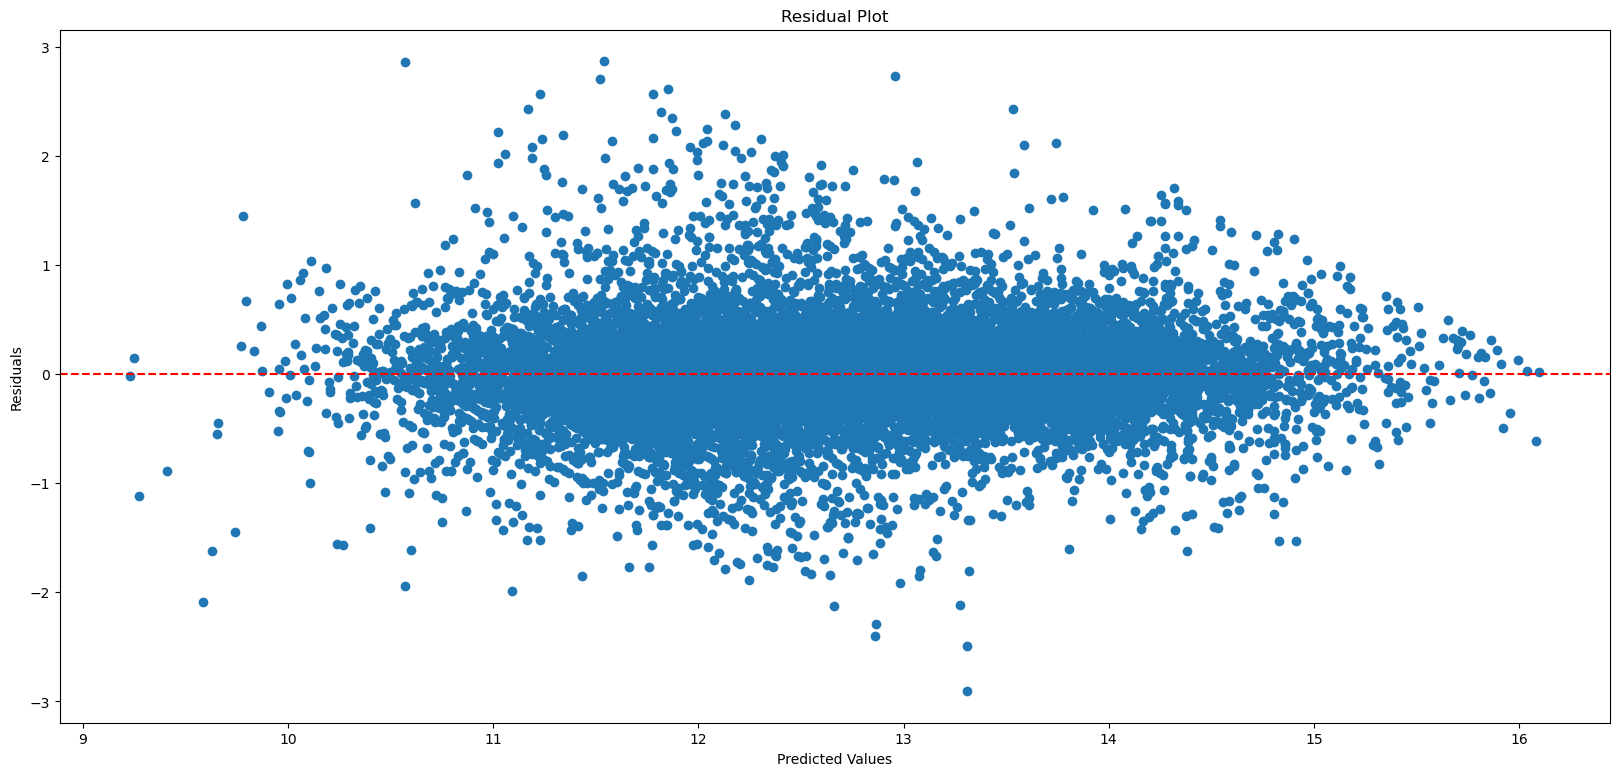

In [24]:
# график остатков на тестовой выборке
residuals = y_test - y_test_predict_gbr_hyp
plt.figure(figsize=(20, 9))
plt.scatter(y_test_predict_gbr_hyp, residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [25]:
# cохраняем модель в файл
dump(model_gbr_hyperopt, "model/model_GradientBoostingRegressorHyperopt.joblib")

['model/model_GradientBoostingRegressorHyperopt.joblib']

In [26]:
# в данную переменную буду сохранять результаты моделей [RSME, MAE, MAPE и название алгоритма]
results = []

# описываем функцию для оценки модели, а также для сохранения значений метрик и последующего использования
def results_model(model, X_train, y_train, X_valid, y_valid, X_test, y_test, model_name, results):
  """Функция для вывода результатов score для train, valid и test, а также для сохранения этих значений для последующего использования.
    
  Аргументы:
    model (model): обученная модель, которую необходимо оценить;
    model_name (string): название используемой модели.
  """
  model_result = []
  # предсказания и оценка для тренировочных данных
  y_train = np.expm1(y_train)
  y_train_pred = np.expm1(model.predict(X_train))
  RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred)).round(3)
  MAE_train = mean_absolute_error(y_train, y_train_pred).round(3)
  MAPE_train = (mean_absolute_percentage_error(y_train, y_train_pred) * 100).round(3)
  # вывод результатов для тренировочных данных
  # print(f"Тренировочная выборка:")
  # print(f"    RMSE: {RMSE_train:.3f}")
  # print(f"    MAE: {MAE_train:.3f}")
  # print(f"    MAPE: {MAPE_train:.2f}%")
  
  # предсказания и оценка для валидационных данных
  y_valid = np.expm1(y_valid)
  y_valid_pred = np.expm1(model.predict(X_valid))
  RMSE_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred)).round(3)
  MAE_valid = mean_absolute_error(y_valid, y_valid_pred).round(3)
  MAPE_valid = (mean_absolute_percentage_error(y_valid, y_valid_pred) * 100).round(3)
  # вывод результатов для валидационных данных
  # print(f"Валидная выборка:")
  # print(f"    RMSE: {RMSE_valid:.3f}")
  # print(f"    MAE: {MAE_valid:.3f}")
  # print(f"    MAPE: {MAPE_valid:.2f}%")
  
  # предсказания и оценка для тестовых данных
  y_test = np.expm1(y_test)
  y_test_pred = np.expm1(model.predict(X_test))
  RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred)).round(3)
  MAE_test = mean_absolute_error(y_test, y_test_pred).round(3)
  MAPE_test = (mean_absolute_percentage_error(y_test, y_test_pred) * 100).round(3)
  # вывод результатов для тестовых данных
  # print(f"Тестовая выборка:")
  # print(f"    RMSE: {RMSE_test:.3f}")
  # print(f"    MAE: {MAE_test:.3f}")
  # print(f"    MAPE: {MAPE_test:.2f}%") 
  
  # сохранение результатов в список model_results
  results.append({
      "RMSE_train": RMSE_train, "MAE_train": MAE_train, "MAPE_train": MAPE_train,
      "RMSE_valid": RMSE_valid, "MAE_valid": MAE_valid, "MAPE_valid": MAPE_valid,
      "RMSE_test": RMSE_test, "MAE_test": MAE_test, "MAPE_test": MAPE_test, 
      "ML_model": model_name
    })
  
  # сохранение результатов в список model_results
  model_result.append({
      "RMSE_train": RMSE_train, "MAE_train": MAE_train, "MAPE_train": MAPE_train,
      "RMSE_valid": RMSE_valid, "MAE_valid": MAE_valid, "MAPE_valid": MAPE_valid,
      "RMSE_test": RMSE_test, "MAE_test": MAE_test, "MAPE_test": MAPE_test, 
      "ML_model": model_name
    })
  
  # создаем dataframe с результатами
  resultmodelScoreData = pd.DataFrame(model_result).set_index('ML_model').sort_values(by='MAPE_test', ascending=True)
  # выводим сводную информацию 
  display(resultmodelScoreData.sort_values(by="MAE_test", ascending=True).round(2))

In [27]:
# делаем предсказания на тренировочной, валидной и тестовой выборках и выводим результат
print("Модель GradientBoostingRegressor:")
results_model(model_gbr, X_train, y_train, X_valid, y_valid, X_test, y_test, "GradientBoostingRegressor", results)
print()
print("Модель GradientBoostingRegressorOptuna - c подбором гиперпараметров (библиотека Optuna):")
results_model(model_gbr_optuna, X_train, y_train, X_valid, y_valid, X_test, y_test, "GradientBoostingRegressorOptuna", results)
print()
print("Модель GradientBoostingRegressorHyperopt - c подбором гиперпараметров (библиотека Hyperopt):")
results_model(model_gbr_hyperopt, X_train, y_train, X_valid, y_valid, X_test, y_test, "GradientBoostingRegressorHyperopt", results)

Модель GradientBoostingRegressor:


,RMSE_train,MAE_train,MAPE_train,RMSE_valid,MAE_valid,MAPE_valid,RMSE_test,MAE_test,MAPE_test
ML_model,,,,,,,,,
GradientBoostingRegressor,459063.13,180512.19,39.39,473632.69,185210.45,39.06,483965.45,185616.8,39.36



Модель GradientBoostingRegressorOptuna - c подбором гиперпараметров (библиотека Optuna):


,RMSE_train,MAE_train,MAPE_train,RMSE_valid,MAE_valid,MAPE_valid,RMSE_test,MAE_test,MAPE_test
ML_model,,,,,,,,,
GradientBoostingRegressorOptuna,239651.02,72031.68,13.18,349422.84,116221.18,21.84,335919.61,113105.06,21.99



Модель GradientBoostingRegressorHyperopt - c подбором гиперпараметров (библиотека Hyperopt):


,RMSE_train,MAE_train,MAPE_train,RMSE_valid,MAE_valid,MAPE_valid,RMSE_test,MAE_test,MAPE_test
ML_model,,,,,,,,,
GradientBoostingRegressorHyperopt,237309.75,70773.66,12.94,344677.79,115201.39,21.65,335814.85,113128.82,21.99
